# Potencial de Rutherford: $V(r)=k/r$, con k>0
## Obtención angulo de dispersión y diferencial de sección transversal

Según el problema al lector propuesto por Numerical Methods in Physics, Gezerlis (pag. 558)
El angulo de dispersión se define por

$\theta= \pi-4b \[ \int_{0}^{1} \frac{\du}{\sqrt{b^2(2-u^2)+(R/Eu^2)(V(R)-V(R/(1-u^2))}} \]$
con $u=\sqrt{1-R/r}$

Donde b: parametro de impacto, R: punto de retorno.
Esta integral se resuelve usando método númerico "Cuadratura de Gauss- Legendre", en python ya existe una función quad para resolver con este metodo.

Antes hay que calcular la rmin es decir R. Usando que en un punto de retorno $E=V(R)$ y $E-V(R)-L^2/2MR^2=0.$, 

### Gráficación potencial efectivo


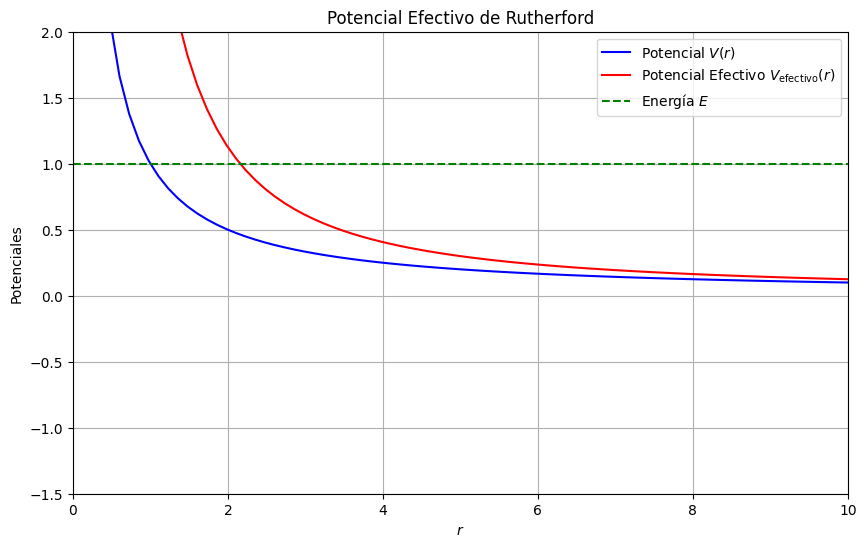

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos constantes
k = 1.0  # valor de k
E = 1.0  # energía
L = 5.0  # momento angular
mu = 5.0  # masa reducida

# Definimos la función del potencial
def V(r, k):
    return k / r

# Definimos la función del potencial efectivo
def V_efectivo(r, k, L, mu):
    V_r = V(r, k)
    return V_r + (L**2) / (2 * mu * r**2)

# Creamos un rango de valores de r
r_values = np.linspace(0.1, 10, 80)  # evitamos r=0 para no tener una singularidad
V_values = V(r_values, k)
V_efectivo_values = V_efectivo(r_values, k, L, mu)

# Graficamos el potencial y el potencial efectivo
plt.figure(figsize=(10, 6))
plt.plot(r_values, V_values, label='Potencial $V(r)$', color='blue')
plt.plot(r_values, V_efectivo_values, label='Potencial Efectivo $V_{\mathrm{efectivo}}(r)$', color='red')
plt.axhline(y=E, color='green', linestyle='--', label='Energía $E$')
plt.title('Potencial Efectivo de Rutherford')
plt.xlabel('$r$')
plt.ylabel('Potenciales')
plt.ylim(-1.5, 2)
plt.xlim(0, 10)
plt.grid()
plt.legend()
plt.show()


Variando los parametros para la gráfica de potencial efectivo se hace evidente que el valor que deben tomar los parametros k y E para producir dispersión. 

# Resolución de integral
## Númericamente se obtiene lo siguiente.

Valores de b y R:
b = 0.01, R = 1.0001
b = 0.21, R = 1.0431
b = 0.41, R = 1.1490
b = 0.62, R = 1.2932
b = 0.82, R = 1.4584
b = 1.02, R = 1.6356
b = 1.22, R = 1.8199
b = 1.42, R = 2.0087
b = 1.63, R = 2.2005
b = 1.83, R = 2.3944
b = 2.03, R = 2.5899
b = 2.23, R = 2.7865
b = 2.43, R = 2.9839
b = 2.63, R = 3.1820
b = 2.84, R = 3.3806
b = 3.04, R = 3.5796
b = 3.24, R = 3.7791
b = 3.44, R = 3.9787
b = 3.64, R = 4.1787
b = 3.85, R = 4.3788
b = 4.05, R = 4.5791
b = 4.25, R = 4.7796
b = 4.45, R = 4.9802
b = 4.65, R = 5.1809
b = 4.86, R = 5.3817
b = 5.06, R = 5.5826
b = 5.26, R = 5.7836
b = 5.46, R = 5.9847
b = 5.66, R = 6.1858
b = 5.87, R = 6.3869
b = 6.07, R = 6.5881
b = 6.27, R = 6.7894
b = 6.47, R = 6.9907
b = 6.67, R = 7.1920
b = 6.88, R = 7.3934
b = 7.08, R = 7.5948
b = 7.28, R = 7.7962
b = 7.48, R = 7.9977
b = 7.68, R = 8.1992
b = 7.88, R = 8.4007
b = 8.09, R = 8.6022
b = 8.29, R = 8.8038
b = 8.49, R = 9.0053
b = 8.69, R = 9.2069
b = 8.89, R = 9.4085
b = 9.10, R = 9.6101
b = 9.30, R = 9.

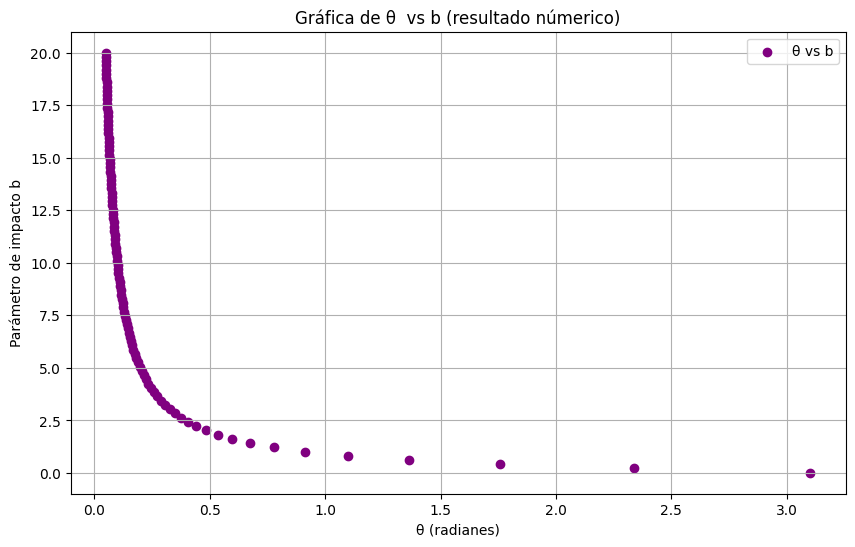

In [7]:
#libreria para calculo numerico
import numpy as np
#para graficar
import matplotlib.pyplot as plt
# para resolver integral definida
from scipy.integrate import quad
# para resolver ecuacion (encontrar raices)en este caso R's
from scipy.optimize import fsolve

# Defino POTENCIAL, que es funcion de R( punto de retorno) y k constante
def V(R, k):
    return k / R

#ENCONTRAR R´S PARA b´s
# ecuacion a resolver para R´s dados muchos b´s
def ecuacion(R, b, k, E):
    return 1 - (b**2 / R**2) - (V(R, k) / E)

# Definimos los parámetros
k = 1.0  # constante k positiva
E = 1.0  # energia E positiva
#generando una cadena de 100 valores de b empezando desde 0.01 hasta 20
valores_b = np.linspace(0.01, 20, 100) 
#cadena de R vacia para almacenar lo que calculemos
valores_R = []

# Resolvemos la ecuación para cada valor de b un R 
print("Valores de b y R:")
#para cada b se hace lo sig
for b in valores_b:
    #valor inicial propuesto de raiz
    R_inicial = 1.0
    #fsolve(funcion, valor inicial R, argumentos(parametros de funcion como constantes))
    R_solucion = fsolve(ecuacion, R_inicial, args=(b, k, E))
    #guardo en la cadena valores_R la primera solución que salio de fsolve
    valores_R.append(R_solucion[0])
    #imprime b= el valor de b con dos decimales .2f
    #imrprime R= el valor de R con 4 decimales .4f
    #f"{x}" sirve para imprimir sobre misma linea algo que mande a llamar y a asignar en este caso el valor de b y R_solucion[0]
    print(f"b = {b:.2f}, R = {R_solucion[0]:.4f}")

# tomo los R's calculados en cadena pa resolver la integral
valores_R = np.array(valores_R)

# Definimos el integrando como funcion
def integrando(u, b, R, E):
    #nombro el potencial para usarlo aca
    V_R = V(R, k)
    #este igual es potencial pero toma aparte de R y k, (1-u^2)
    V_R_prima = V(R / (1 - u**2), k) 
    denominador = b**2 * (2 - u**2) + (R**2 / (E * u**2)) * (V_R - V_R_prima)
    return 1 / np.sqrt(denominador)  # raiz cuadrada en el denominador

# cadena vacia para almacenar valores de theta
valores_theta = []

# Calculo la integral para cada b y R
# CUADRATURA DE GAUSS LEGENDRE!
print("\nValores de b y θ:")
#se usa zip para tomar dos listas de variables a iterar
for b, R in zip(valores_b, valores_R):
    #quad(funcion, limite inferior, limite superior, argumentos de la función(valores que necesita la función, no la variable))
    #el valor de la intergral se guarda en valor_integral, se pone ,_ para no agregar como resultado el valor de error estimado
    valor_integral, _ = quad(integrando, 0, 1, args=(b, R, E))
    theta = np.pi - 4 * b * valor_integral  # Calculamos theta
    #append agrega ese valor de theta calculado a la lista de valores_theta
    valores_theta.append(theta)
    #imprimo el valor de b luego de b= y el valor de theta para θ =, igual 2 y 4 decimales respectivamente  
    print(f"b = {b:.2f}, θ = {theta:.4f}") 

# cadena llenita de valores de theta
valores_theta = np.array(valores_theta)

# Grafico theta vs b
plt.figure(figsize=(10, 6))
plt.scatter(valores_theta, valores_b, label= 'θ vs b', color='purple')
#pongo el r para escribir theta simbolito
plt.title(r'Gráfica de θ  vs b (resultado númerico)')
plt.xlabel('θ (radianes)')
plt.ylabel('Parámetro de impacto b')
plt.grid()
plt.legend()
plt.show()

# Analiticamente se obtiene lo siguiente
En este caso se gráfica el resultado obtenido analiticamente para  directamente para comparar con los resultados obtenidos númericamente.

Valores de b y θ:
b = 0.01, θ = 3.1016
b = 0.21, θ = 2.3398
b = 0.41, θ = 1.7588
b = 0.62, θ = 1.3640
b = 0.82, θ = 1.0976
b = 1.02, θ = 0.9119
b = 1.22, θ = 0.7770
b = 1.42, θ = 0.6756
b = 1.63, θ = 0.5969
b = 1.83, θ = 0.5342
b = 2.03, θ = 0.4832
b = 2.23, θ = 0.4409
b = 2.43, θ = 0.4054
b = 2.63, θ = 0.3751
b = 2.84, θ = 0.3489
b = 3.04, θ = 0.3262
b = 3.24, θ = 0.3062
b = 3.44, θ = 0.2885
b = 3.64, θ = 0.2727
b = 3.85, θ = 0.2585
b = 4.05, θ = 0.2458
b = 4.25, θ = 0.2342
b = 4.45, θ = 0.2237
b = 4.65, θ = 0.2140
b = 4.86, θ = 0.2052
b = 5.06, θ = 0.1971
b = 5.26, θ = 0.1895
b = 5.46, θ = 0.1826
b = 5.66, θ = 0.1761
b = 5.87, θ = 0.1701
b = 6.07, θ = 0.1644
b = 6.27, θ = 0.1592
b = 6.47, θ = 0.1542
b = 6.67, θ = 0.1496
b = 6.88, θ = 0.1452
b = 7.08, θ = 0.1411
b = 7.28, θ = 0.1372
b = 7.48, θ = 0.1335
b = 7.68, θ = 0.1300
b = 7.88, θ = 0.1267
b = 8.09, θ = 0.1235
b = 8.29, θ = 0.1205
b = 8.49, θ = 0.1176
b = 8.69, θ = 0.1149
b = 8.89, θ = 0.1123
b = 9.10, θ = 0.1098
b = 9.30, θ = 0.

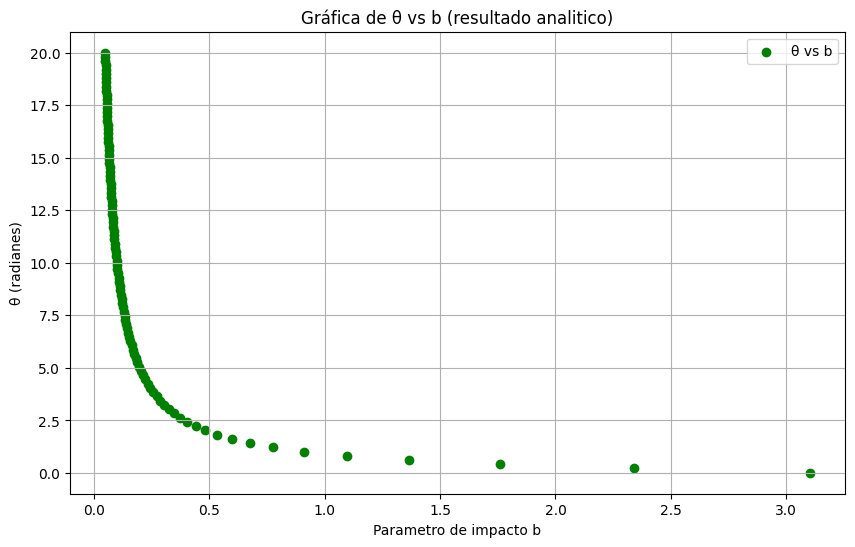

In [8]:
import numpy as np
import matplotlib.pyplot as plt


k = 1.0  #  ajustable
E = 1.0  #ajustable
b_values = np.linspace(0.01, 20, 100)  # igual rango de b de 0.01 a 20

theta_values = []

print("Valores de b y θ:")
for b in b_values:
    term = (k / (2 * b * E))
    theta = 2*(np.pi/2 - np.arccos(term / np.sqrt(1 + term**2)))  # calc de θ
    theta_values.append(theta)
    print(f"b = {b:.2f}, θ = {theta:.4f}")  # imprimo! s b y θ

theta_values = np.array(theta_values)

plt.figure(figsize=(10, 6))
plt.scatter(theta_values, b_values, label='θ vs b', color='green')
plt.title('Gráfica de θ vs b (resultado analitico)')
plt.xlabel('Parametro de impacto b')
plt.ylabel('θ (radianes)')
plt.grid()
plt.legend()
plt.show()


### Como comparación se gráfica el resultado obtenido númerica y analiticamente. Notese que las gráficas se superponen quisieramos.

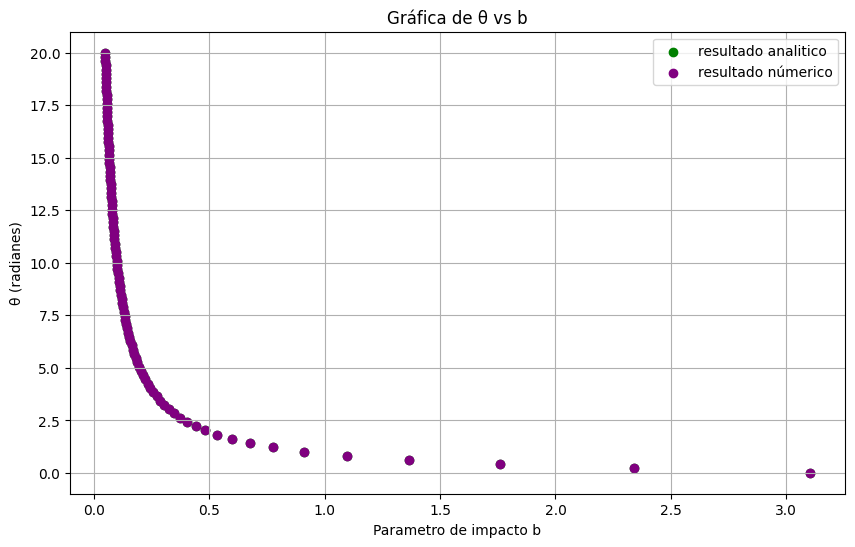

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(theta_values, b_values, label= r'resultado analitico', color='green')
plt.scatter(valores_theta, valores_b, label= r'resultado númerico', color='purple')
plt.title('Gráfica de θ vs b')
plt.xlabel('Parametro de impacto b')
plt.ylabel('θ (radianes)')
plt.grid()
plt.legend()
plt.show()


# Calculo del diferencial de sección transversal
Ahora vamos a calcular la diferencial de sección transversal de forma númerica usando la definición
$\sigma(\theta)= \frac{b}{sin\theta} \frac{1}{|d\theta/db|}$ pues así se puede usar el método númerico de diferencia central (*) para aproximar la derivada:

$\frac{d\theta}{db} \approx \frac{\theta(i+1) - \theta(i-1)}{b(i+1) - b(i-1)}$ Esta se usa para los valores de desde 1 hasta theta-1 omitiendo los valores de frontera 0 y -1, luego se calcula especifico para esos valores extremos es decir:

Para i =0 se usa $\frac{d\theta}{db} \approx \frac{\theta(1) - \theta(0)}{b(1) - b(0)}$)Para n=-1 se usa $\frac{d\theta}{db} \approx \frac{\theta(-1) - \theta(-2)}{b(-1) - b(-2)}$-2)}
\]



Valores de b y σ:
b = 0.01, σ = 0.0663
b = 0.21, σ = 0.0887
b = 0.41, σ = 0.1743
b = 0.62, σ = 0.3843
b = 0.82, σ = 0.8204
b = 1.02, σ = 1.6244
b = 1.22, σ = 2.9777
b = 1.42, σ = 5.1019
b = 1.63, σ = 8.2582
b = 1.83, σ = 12.7478
b = 2.03, σ = 18.9117
b = 2.23, σ = 27.1310
b = 2.43, σ = 37.8265
b = 2.63, σ = 51.4591
b = 2.84, σ = 68.5292
b = 3.04, σ = 89.5776
b = 3.24, σ = 115.1847
b = 3.44, σ = 145.9708
b = 3.64, σ = 182.5962
b = 3.85, σ = 225.7610
b = 4.05, σ = 276.2052
b = 4.25, σ = 334.7089
b = 4.45, σ = 402.0918
b = 4.65, σ = 479.2136
b = 4.86, σ = 566.9740
b = 5.06, σ = 666.3125
b = 5.26, σ = 778.2085
b = 5.46, σ = 903.6813
b = 5.66, σ = 1043.7900
b = 5.87, σ = 1199.6339
b = 6.07, σ = 1372.3519
b = 6.27, σ = 1563.1228
b = 6.47, σ = 1773.1655
b = 6.67, σ = 2003.7386
b = 6.88, σ = 2256.1408
b = 7.08, σ = 2531.7104
b = 7.28, σ = 2831.8259
b = 7.48, σ = 3157.9054
b = 7.68, σ = 3511.4072
b = 7.88, σ = 3893.8293
b = 8.09, σ = 4306.7097
b = 8.29, σ = 4751.6261
b = 8.49, σ = 5230.1964
b 

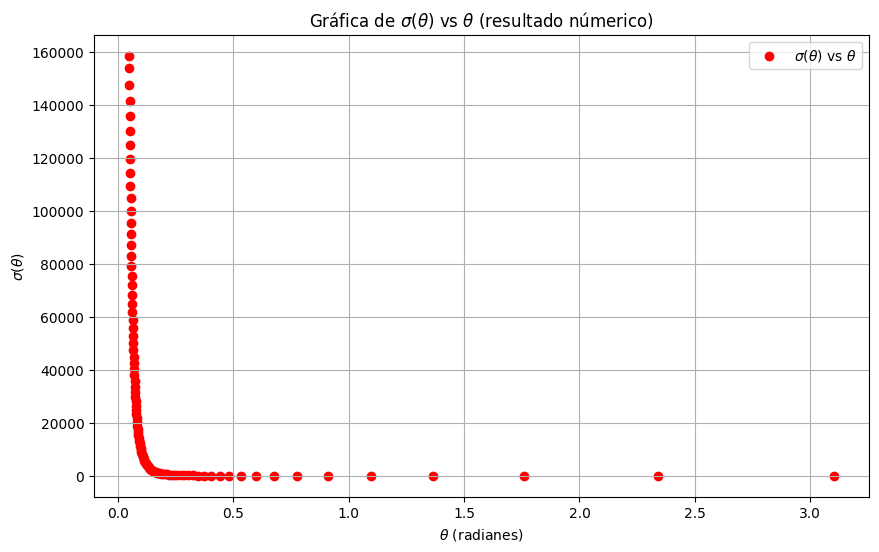

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#creo funcion diferencia_central para calcular la derivada númerica de theta con respecto a b
def diferencia_central(valores_theta, valores_b):
    dtheta_db = np.zeros_like(valores_theta) # cadena que toma cadena de valores theta y la llena con ceros para despues aqui guardar derivadas
    #itera para i desde 1 hasta theta-1, para cada i se calcula la derivada usando formula de diferencia central de (*
    for i in range(1, len(valores_theta) - 1):
        dtheta_db[i] = (valores_theta[i + 1] - valores_theta[i - 1]) / (valores_b[i + 1] - valores_b[i - 1])
    #diferencia para los extremos 
    dtheta_db[0] = (valores_theta[1] - valores_theta[0]) / (valores_b[1] - valores_b[0])
    dtheta_db[-1] = (valores_theta[-1] - valores_theta[-2]) / (valores_b[-1] - valores_b[-2])
    return dtheta_db
    
def calcular_sigma(valores_theta, valores_b):
    #manda a llamar cadena que ya calculo la derivada para todas las i
    dtheta_db = diferencia_central(valores_theta, valores_b) 
    #calcula sigma
    sigma_valores = valores_b / (np.sin(valores_theta) * np.abs(dtheta_db))  # Calcular sigma
    return sigma_valores

# calculo de sigma para los valores de theta y b obtenidos
sigma_valores = calcular_sigma(valores_theta, valores_b)

print("\nValores de b y σ:")
for b, sigma in zip(valores_b, sigma_valores):
    print(f"b = {b:.2f}, σ = {sigma:.4f}")

# graficoo sigma vs theta
plt.figure(figsize=(10, 6))
plt.scatter(valores_theta, sigma_valores, label=r'$\sigma(\theta)$ vs $\theta$', color='red')
plt.title(r'Gráfica de $\sigma(\theta)$ vs $\theta$ (resultado númerico)')
plt.xlabel(r'$\theta$ (radianes)')
plt.ylabel(r'$\sigma(\theta)$')
plt.grid(True)
plt.legend()
plt.show()


Gráficando la solución obtenida para $\sigma(\theta)= b/sin\theta (1/|d\theta/db|)$ es decir, tomando los valores calculados por la solución de la integral de forma analitica para theta, se calcula $\sigma(\theta)= (k/4E)^2 1/sen^4(\theta/2))$ para la diferencial de sigma con respecto a theta.


Valores de θ y σ(θ):
θ = 3.1016, σ(θ) = 0.062550
θ = 2.3398, σ(θ) = 0.086972
θ = 1.7588, σ(θ) = 0.177462
θ = 1.3640, σ(θ) = 0.395839
θ = 1.0976, σ(θ) = 0.843817
θ = 0.9119, σ(θ) = 1.663006
θ = 0.7770, σ(θ) = 3.034910
θ = 0.6756, σ(θ) = 5.180929
θ = 0.5969, σ(θ) = 8.362358
θ = 0.5342, σ(θ) = 12.880387
θ = 0.4832, σ(θ) = 19.076103
θ = 0.4409, σ(θ) = 27.330487
θ = 0.4054, σ(θ) = 38.064414
θ = 0.3751, σ(θ) = 51.738657
θ = 0.3489, σ(θ) = 68.853882
θ = 0.3262, σ(θ) = 89.950652
θ = 0.3062, σ(θ) = 115.609425
θ = 0.2885, σ(θ) = 146.450552
θ = 0.2727, σ(θ) = 183.134282
θ = 0.2585, σ(θ) = 226.360760
θ = 0.2458, σ(θ) = 276.870022
θ = 0.2342, σ(θ) = 335.442003
θ = 0.2237, σ(θ) = 402.896533
θ = 0.2140, σ(θ) = 480.093337
θ = 0.2052, σ(θ) = 567.932033
θ = 0.1971, σ(θ) = 667.352137
θ = 0.1895, σ(θ) = 779.333060
θ = 0.1826, σ(θ) = 904.894106
θ = 0.1761, σ(θ) = 1045.094479
θ = 0.1701, σ(θ) = 1201.033273
θ = 0.1644, σ(θ) = 1373.849480
θ = 0.1592, σ(θ) = 1564.721987
θ = 0.1542, σ(θ) = 1774.869576
θ = 0.14

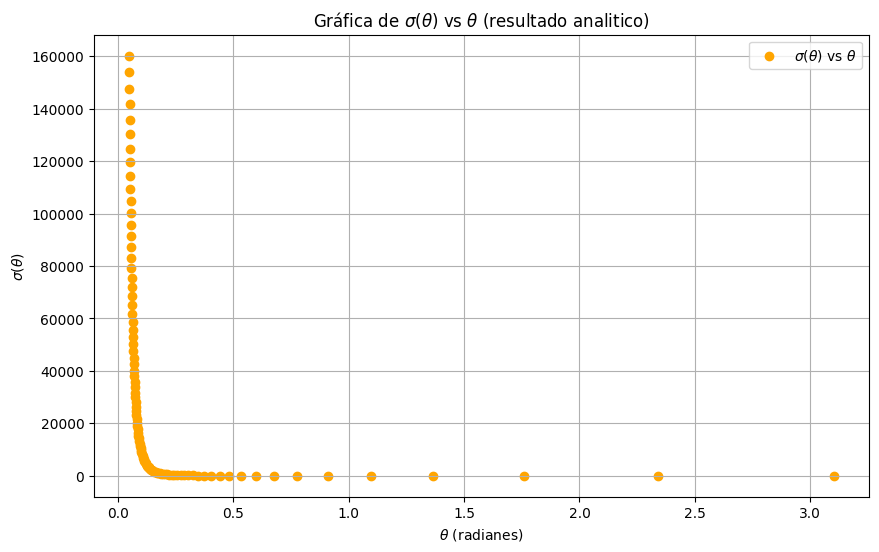

In [11]:
import numpy as np
import matplotlib.pyplot as plt
k = 1.0  
E = 1.0  

# Utilizamos los valores de theta que ya calculamos (valores_theta) con el resultado analitico de la integral

def formula_sigma(valores_theta, k, E):
    return (k / (4 * E))**2 * (1 / np.sin(valores_theta / 2)**4)

# Calcular sigma para los valores de theta
Sigma_valores = formula_sigma(valores_theta, k, E)

# Imprimir los valores de theta y sigma
print("\nValores de θ y σ(θ):")
for theta, sigma in zip(valores_theta, Sigma_valores):
    print(f"θ = {theta:.4f}, σ(θ) = {sigma:.6f}")

# Graficar sigma vs theta con puntos
plt.figure(figsize=(10, 6))
plt.scatter(valores_theta, Sigma_valores, label=r'$\sigma(\theta)$ vs $\theta$', color='orange')
plt.title(r'Gráfica de $\sigma(\theta)$ vs $\theta$ (resultado analitico)')
plt.xlabel(r'$\theta$ (radianes)')
plt.ylabel(r'$\sigma(\theta)$')
plt.grid(True)
plt.legend()
plt.show()


### Para comprobar la exactitud de nuestros resultados númericos en comparación de los resultados análiticos gráficamos ambos sigmas.
Como se desea, se superponen, siendo entonces un buen resultado.

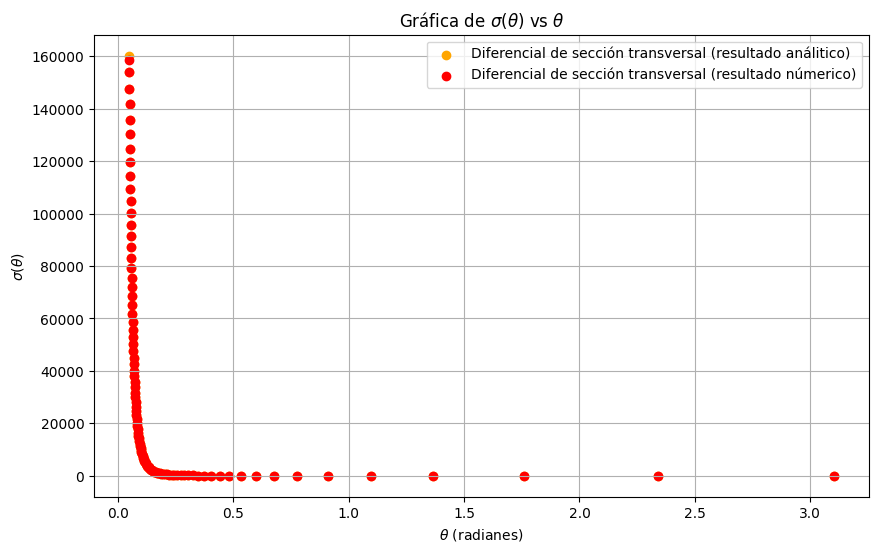

In [12]:
# Graficar sigma vs theta con puntos
plt.figure(figsize=(10, 6))
plt.scatter(valores_theta, Sigma_valores, label=r'Diferencial de sección transversal (resultado análitico)', color='orange')
plt.scatter(valores_theta, sigma_valores, label=r'Diferencial de sección transversal (resultado númerico)', color='red')
plt.title(r'Gráfica de $\sigma(\theta)$ vs $\theta$')
plt.xlabel(r'$\theta$ (radianes)')
plt.ylabel(r'$\sigma(\theta)$')
plt.grid(True)
plt.legend()
plt.show()
